<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

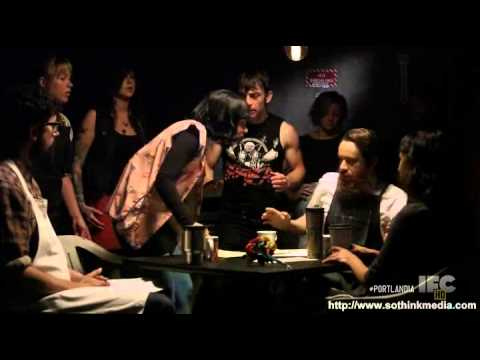

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [76]:
import pandas as pd

shops = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')

def wrangle_data(df):
    
    # get only an integer for star_rating
    df['star_rating'] = [float(i.split()[0]) for i in df.star_rating]
    
    # get the date from full_review_text
    df['date'] = df['full_review_text'].apply(lambda x: x.split()[0])
    
    # get just the text from full_review_text
    df['full_review_text'] = shops['full_review_text'].apply(lambda x: ' '.join(x.split()[1:]))
    
    # rename columns
    df = df.rename(columns={
        'star_rating':'rating'
    })
    
    return df

shops = wrangle_data(shops)

In [3]:
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [6]:
import spacy

nlp = spacy.load('en_core_web_md')

In [41]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= '-PRON-') and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [42]:
shops['tokens'] = shops['full_review_text'].apply(get_lemmas)

In [43]:
shops.tokens

0       [1, check, in, love, love, love, the, atmosphe...
1       [list, in, date, night, austin, ambiance, in, ...
2       [1, check, in, listed, in, brunch, spots, love...
3       [very, cool, decor, good, drink, nice, seating...
4       [1, check, in, be, locate, within, the, northc...
5       [1, check, in, very, cute, cafe, think, from, ...
6       [2, check, in, list, in, nuptial, coffee, blis...
7       [2, check, in, love, this, place, 5, star, for...
8       [1, check, in, ok, let, try, this, approach, p...
9       [3, check, in, this, place, have, be, show, on...
10      [1, check, in, listed, in, americano, this, be...
11      [the, store, have, a+, decoration, but, honest...
12      [1, check, in, listed, in, 2016, the, third, t...
13      [this, be, such, a, cute, little, cafe, have, ...
14      [beautiful, eccentric, coffee, shop, with, a, ...
15      [1, check, in, listed, in, in, search, of, fan...
16      [really, love, the, atmosphere, here, frequent...
17      [1, ch

In [44]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

# How do we want to analyze these coffee shop tokens?

- overall word / token count
- view counts by rating


In [45]:
wc = count(shops['tokens'])

In [46]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,be,7080,42706,1.0,0.057596,0.057596,0.929622
64,the,6854,34883,2.0,0.047046,0.104642,0.899947
7,and,6867,26746,3.0,0.036071,0.140713,0.901654
6,a,6247,22791,4.0,0.030738,0.171451,0.820247
16,to,5692,17442,5.0,0.023523,0.194974,0.747374


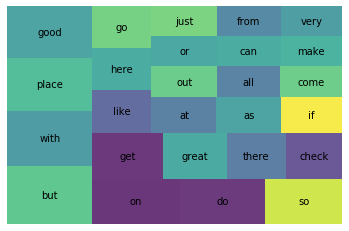

In [47]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[(wc['rank'] <= 40) & (wc['rank']>14)]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [48]:
shops['coffee_shop_name'].nunique()

79

//anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


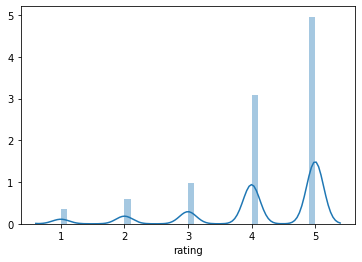

In [49]:
# Look at Bad Coffee Shops

# What is a 'bad' coffee shop?
import seaborn as sns

sns.distplot(shops['rating']);

### A 'bad' coffee shop has a rating between 1 & 3 based on the distribution of ratings

In [50]:
wc_bad = count(shops[shops['rating'] <4]['tokens'])
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
18,be,1431,10412,1.0,0.061276,0.061276,0.969512
56,the,1369,8215,2.0,0.048347,0.109623,0.927507
6,and,1320,5364,3.0,0.031568,0.141191,0.894309
3,a,1264,5059,4.0,0.029773,0.170964,0.856369
103,to,1208,4461,5.0,0.026254,0.197217,0.818428


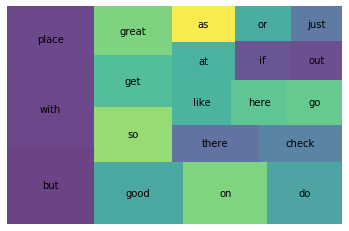

In [54]:
wc_top20_bad = wc_bad[(wc_bad['rank'] <= 25) & (wc_bad['rank'] >5)]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [55]:
wc_good = count(shops[shops['rating'] >3]['tokens'])

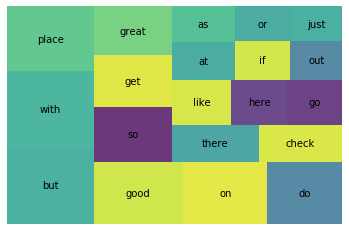

In [58]:
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes:
   - Rel. freq instead of absolute counts
   - Only look at the top 5-10 words with the greatest differences
    

In [63]:
wc_good.iloc[10:20]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,for,3501,6620,11.0,0.011582,0.290250,0.570195
137,not,3270,6350,12.0,0.011110,0.301360,0.532573
90,this,3181,5135,13.0,0.008984,0.310344,0.518078
176,with,2803,5048,14.0,0.008832,0.319176,0.456515
52,that,2597,4855,15.0,0.008494,0.327670,0.422964
103,place,3130,4810,16.0,0.008416,0.336086,0.509772
240,good,3099,4726,17.0,0.008269,0.344355,0.504723
30,but,2846,4652,18.0,0.008139,0.352494,0.463518
26,on,2574,4135,19.0,0.007235,0.359729,0.419218
153,do,2262,3675,20.0,0.006430,0.366159,0.368404


In [72]:
wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_pct']
diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct_bad']]
                        , how='outer', suffixes=['_good','_bad'])
diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,be,0.920033,0.969512
1,the,0.893322,0.927507
2,and,0.903420,0.894309
3,a,0.811564,0.856369
4,to,0.730293,0.818428


In [74]:
diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']
diff.head()

,word,appears_in_pct,appears_in_pct_bad,diff
0,be,0.920033,0.969512,-0.049480
1,the,0.893322,0.927507,-0.034184
2,and,0.903420,0.894309,0.009111
3,a,0.811564,0.856369,-0.044805
4,to,0.730293,0.818428,-0.088135


In [75]:
diff.sort_values(by='diff')

,word,appears_in_pct,appears_in_pct_bad,diff
11,not,0.532573,0.792683,-0.260110
17,but,0.463518,0.676152,-0.212634
19,do,0.368404,0.537263,-0.168859
44,just,0.222638,0.378726,-0.156088
14,that,0.422964,0.569106,-0.146142
52,would,0.197231,0.335366,-0.138135
26,like,0.273290,0.403794,-0.130504
62,order,0.165147,0.294038,-0.128891
115,no,0.098371,0.222222,-0.123851
29,at,0.265798,0.370596,-0.104798


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

